In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def getDf():
    files = {}
    for size in range(1, 5):
        with open("../result/resultRustImmutable_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]
        
    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        for col in ["size", 'inittime', 'addtime', 'totaltime']:
            df[col] = df[col].map(lambda x: int(x))
        dfs[k] = df
    df = dfs['size1']
    for s in range(2, 5):
        df = pd.concat([df, dfs["size{}".format(s)]])
    return df

In [42]:
df_immutable = getDf()

In [43]:
df_immutable = df_immutable.astype({ "size": "int32", "inittime": "int32", \
                "addtime": "int32", "totaltime": "int32"})

In [44]:
df_immutable

,datastructure,element,size,inittime,addtime,totaltime
1,[RustVector],Integer,10,1322,138,4828
2,[RustVector],String,10,915,335,155366
3,[RustVector],CharArr,10,1270,144,3429
4,[RustVector],Object,10,1038,161,92820
5,[RustVector],Integer,10,1790,154,5256
...,...,...,...,...,...,...
16,[RustVector],Object,10000,1796,221569,345696
17,[RustVector],Integer,10000,3925,42091,955311
18,[RustVector],String,10000,5840,148638,73479262
19,[RustVector],CharArr,10000,73034,49424,1283511


In [46]:
withInit_immutable = df_immutable.groupby(['element', 'size']).mean().reset_index()


In [47]:
withInit_immutable

,element,size,inittime,addtime,totaltime
0,CharArr,10,1300.8,171.4,3609.4
1,CharArr,100,2299.6,216.0,13675.6
2,CharArr,1000,8481.4,1982.2,115662.2
3,CharArr,10000,72899.4,50320.4,1275439.0
4,Integer,10,1477.6,159.4,5117.4
5,Integer,100,1420.6,186.0,12915.0
6,Integer,1000,3955.0,2524.4,98889.6
7,Integer,10000,4761.8,40750.2,945281.4
8,Object,10,1111.0,183.2,100454.6
9,Object,100,1151.0,239.4,92025.4


In [48]:
def getDf(data_structure):
    files = {}
    for size in range(1, 5):
        with open("../../analysis/result{}_{}.txt".format(data_structure, size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]
        
    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        for col in ["size", 'inittime', 'addtime', 'totaltime']:
            df[col] = df[col].map(lambda x: int(x))
        df['initialization'] = df['initialization'].map(lambda x: True if x == "true" else False)
        dfs[k] = df
    df = dfs['size1']
    for s in range(2, 5):
        df = pd.concat([df, dfs["size{}".format(s)]])
    return df

In [49]:
df_base = pd.DataFrame(columns=["datastructure", "initialization", "size", "inittime", "addtime", "totaltime", "element"])
for data_structure in ["JavaAlloc", "RustAlloc"]:
    for element in ["", "CharArr", "String", "Object"]:
        df = getDf("{}{}".format(data_structure, element))
        if data_structure == "JavaAlloc":
            df["datastructure"] = "JavaArrayList"
        elif data_structure == "RustAlloc":
            df["datastructure"] = "RustVector"
        if element == "":
            df["element"] = "Integer"
        else:
            df["element"] = element           
        df_base = pd.concat([df_base, df])

In [50]:
df_base = df_base.astype({"initialization": "bool", "size": "int32", "inittime": "int32", \
                "addtime": "int32", "totaltime": "int32"})

In [51]:
df_rustVector = df_base[df_base["datastructure"] == "RustVector"]
withoutInit_rust = df_rustVector[df_rustVector["initialization"] != True].groupby(['element', 'size']).mean().reset_index()
withInit_rust = df_rustVector[df_rustVector["initialization"] == True].groupby(['element', 'size']).mean().reset_index()

In [52]:
withInit_rust

,element,size,initialization,inittime,addtime,totaltime
0,CharArr,10,True,1264.8,2515.2,13940.8
1,CharArr,100,True,3803.4,17684.4,39851.0
2,CharArr,1000,True,3915.6,190811.8,320487.2
3,CharArr,10000,True,5799.6,1923282.6,3191423.4
4,Integer,10,True,1165.6,1780.8,3384.8
5,Integer,100,True,1402.2,11162.0,12980.0
6,Integer,1000,True,3730.2,87022.4,91219.0
7,Integer,10000,True,3881.2,889196.4,893558.8
8,Object,10,True,1487.6,2620.0,190719.4
9,Object,100,True,4776.0,10783.0,198823.4


In [53]:
withInit_immutable

,element,size,inittime,addtime,totaltime
0,CharArr,10,1300.8,171.4,3609.4
1,CharArr,100,2299.6,216.0,13675.6
2,CharArr,1000,8481.4,1982.2,115662.2
3,CharArr,10000,72899.4,50320.4,1275439.0
4,Integer,10,1477.6,159.4,5117.4
5,Integer,100,1420.6,186.0,12915.0
6,Integer,1000,3955.0,2524.4,98889.6
7,Integer,10000,4761.8,40750.2,945281.4
8,Object,10,1111.0,183.2,100454.6
9,Object,100,1151.0,239.4,92025.4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


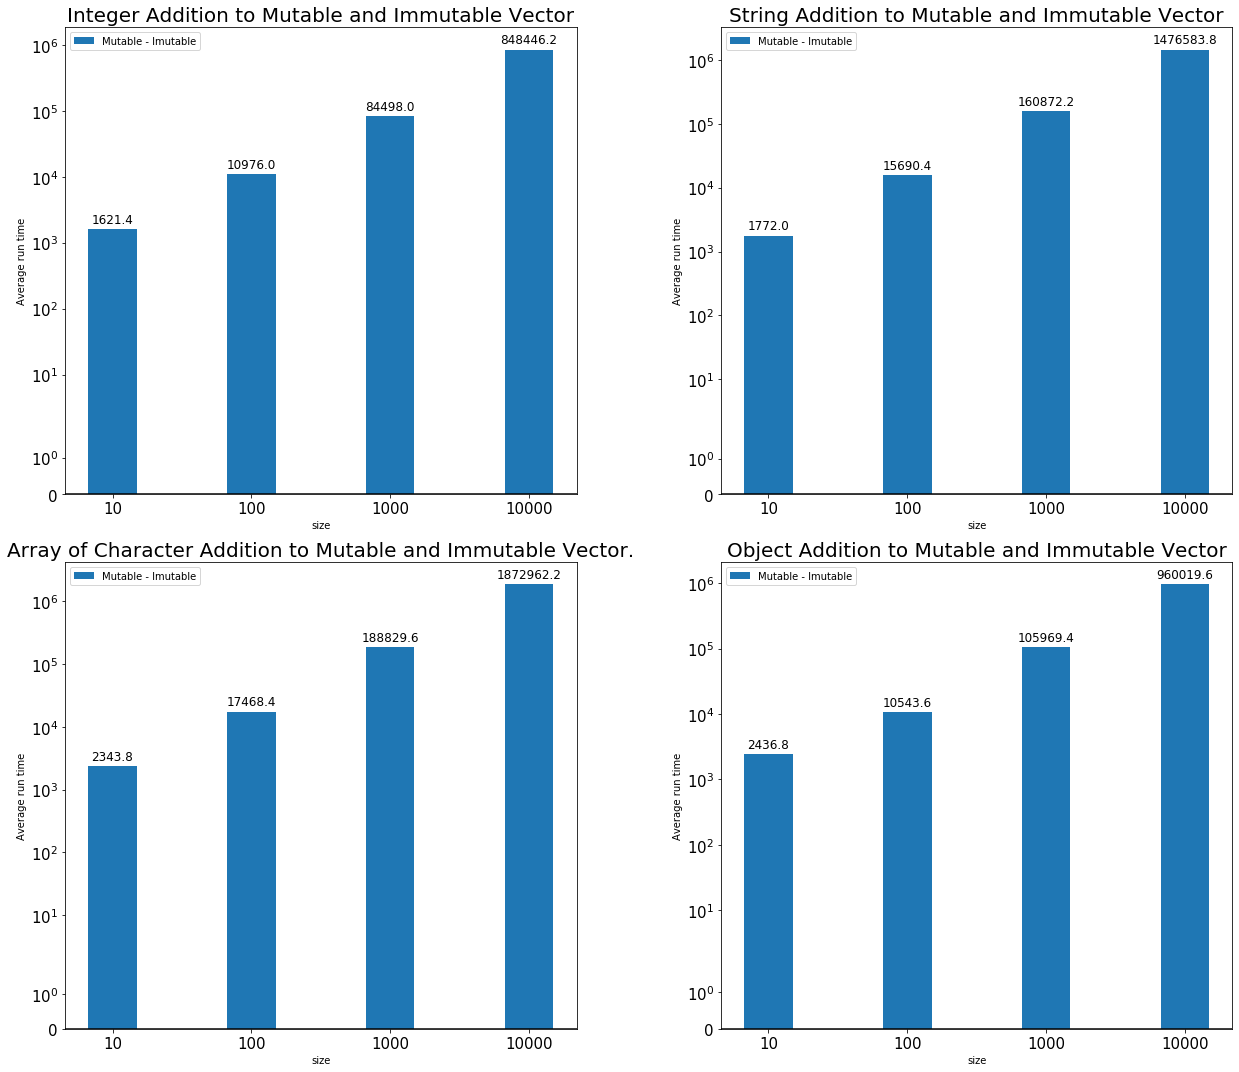

In [61]:
# Barplot taking difference.
width = 0.35 
fig, axs = plt.subplots(figsize = (18, 15), nrows=2, ncols=2)
idx = 0
element = ['Integer', 'String', 'CharArr', 'Object']
for row in range(0,2):
    for col in range(0,2):
        average_withInit = withInit_rust[withInit_rust['element'] == element[idx]].addtime
        average_withoutInit_immutable = withInit_immutable[withInit_immutable['element'] == element[idx]].addtime
        labels = np.array([10, 100, 1000, 10000])
        x = np.arange(len(labels))
        rects1 = axs[row, col].bar(x, np.round((average_withInit - average_withoutInit_immutable), 1), width, label='Mutable - Imutable')

        if element[idx] == "CharArr":
            axs[row, col].set_title("{} Addition to Mutable and Immutable Vector.".format('Array of Character'), fontsize = 20)
        else :
            axs[row, col].set_title("{} Addition to Mutable and Immutable Vector".format(element[idx]), fontsize = 20)
        axs[row, col].set_xlabel("size", fontsize=10)
        axs[row, col].set_ylabel("Average run time", fontsize=10)
        axs[row, col].set_xticks(x)
        axs[row, col].set_xticklabels(labels, fontsize=15)
        axs[row, col].yaxis.set_tick_params(labelsize=15)
        axs[row, col].set_yscale('symlog')
        axs[row, col].axhline(color = 'black')
        axs[row, col].legend()
        def autolabel(rects):
            """Attach a text label above each bar in *rects*, displaying its height."""
            for rect in rects:
                height = rect.get_height()
                axs[row, col].annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize = 12)
        autolabel(rects1)
        idx += 1
fig.tight_layout()
fig.savefig("rust_arraylist_difference_immutablity.eps")
plt.show()